In [1]:
#from gensim.models import Word2Vec 
import numpy as np
import gensim.downloader as api
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sb
# https://code.google.com/archive/p/word2vec/
# https://nlp.stanford.edu/projects/glove/

### Word2Vec (~1.8GB)

In [2]:
# %%time
#v2w_model = api.load('word2vec-google-news-300')
#sample_word2vec_embedding=v2w_model['computer']

### GloVe (~100MB)

In [3]:
%%time
glove_model = api.load('glove-twitter-25')


CPU times: total: 21.8 s
Wall time: 22.3 s


In [4]:
glove_model['queen']

array([-1.1266  , -0.52064 ,  0.45565 ,  0.21079 , -0.05081 , -0.65158 ,
        1.1395  ,  0.69897 , -0.20612 , -0.71803 , -0.02811 ,  0.10977 ,
       -3.3089  , -0.49299 , -0.51375 ,  0.10363 , -0.11764 , -0.084972,
        0.02558 ,  0.6859  , -0.29196 ,  0.4594  , -0.39955 , -0.40371 ,
        0.31828 ], dtype=float32)

In [5]:
glove_model['king']

array([-0.74501 , -0.11992 ,  0.37329 ,  0.36847 , -0.4472  , -0.2288  ,
        0.70118 ,  0.82872 ,  0.39486 , -0.58347 ,  0.41488 ,  0.37074 ,
       -3.6906  , -0.20101 ,  0.11472 , -0.34661 ,  0.36208 ,  0.095679,
       -0.01765 ,  0.68498 , -0.049013,  0.54049 , -0.21005 , -0.65397 ,
        0.64556 ], dtype=float32)

In [6]:
glove_model['spaceship']

array([-0.8316  , -0.23126 ,  0.67288 , -0.091046, -0.82664 , -0.25896 ,
        0.62157 , -1.0511  ,  1.2945  , -0.22905 ,  0.078044,  0.48409 ,
       -1.4054  ,  0.31454 , -0.39953 ,  1.3841  ,  0.99626 ,  0.57326 ,
        1.075   ,  0.2621  , -0.19889 , -0.22024 ,  0.62625 , -1.3682  ,
        0.33384 ], dtype=float32)

In [7]:
cosine_similarity(X=[glove_model['queen']], Y=[glove_model['king']])

array([[0.92024213]], dtype=float32)

In [8]:
cosine_similarity(X=[glove_model['queen']], Y=[glove_model['spaceship']])

array([[0.42425072]], dtype=float32)

In [9]:
cities_and_states = np.array([glove_model['london'], glove_model['berlin'], glove_model['athens'], glove_model['dublin'], glove_model['vienna'],
                              glove_model['england'], glove_model['germany'], glove_model['greece'], glove_model['ireland'], glove_model['austria']])

In [10]:
cities_and_states

array([[-1.0719e+00, -1.7373e-01,  2.5545e-01, -1.5967e+00, -6.6160e-01,
        -7.0777e-02,  7.8288e-01, -6.3708e-02,  5.3580e-01, -3.5518e-03,
         1.6287e-01,  4.5497e-02, -3.8279e+00,  6.5761e-01,  7.5505e-01,
        -4.8099e-01,  1.1825e-01, -4.5508e-01, -6.5654e-01,  3.7498e-02,
        -9.6969e-01, -9.8772e-01, -7.4493e-01, -1.1787e+00,  3.1325e-01],
       [-5.3995e-01, -3.8995e-01, -2.2972e-01, -1.6908e+00, -4.9780e-01,
         1.2630e-01, -6.3728e-01, -3.6293e-01,  6.0700e-01, -5.3977e-01,
         4.1631e-01,  6.8241e-01, -2.1903e+00, -2.6983e-01,  5.6122e-01,
        -9.1140e-01,  1.3166e-01,  8.5549e-01, -1.2319e+00, -4.2256e-01,
        -3.1423e-01, -7.4786e-01, -4.9782e-01, -8.0472e-01,  1.4722e+00],
       [-4.5828e-01,  2.7490e-01,  4.5753e-01, -1.2788e+00, -1.5212e+00,
        -3.6405e-01,  1.1937e-01, -1.5311e+00,  4.1623e-01,  2.6696e-01,
        -6.7764e-01,  8.6867e-03, -1.7756e+00,  7.3273e-01,  7.1552e-01,
        -1.0939e+00,  4.5773e-02, -3.5376e-02,  7

# Move to an even lower dimensionality

In [11]:
tsne = TSNE(n_components=2, perplexity=2, random_state=42)
X_embedded = tsne.fit_transform(cities_and_states)


C:\Users\yhoresh\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\yhoresh\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [12]:
X_embedded

array([[ 26.092596 , -27.034374 ],
       [-87.88941  ,  -9.220333 ],
       [-30.69853  , -68.234215 ],
       [ -3.1931484, -42.487087 ],
       [-42.5202   , -47.493446 ],
       [ 43.869663 ,  95.19309  ],
       [ 15.017041 ,  94.084564 ],
       [-19.399817 , 130.49062  ],
       [  2.1077178, 110.32315  ],
       [-63.526985 , -31.999437 ]], dtype=float32)

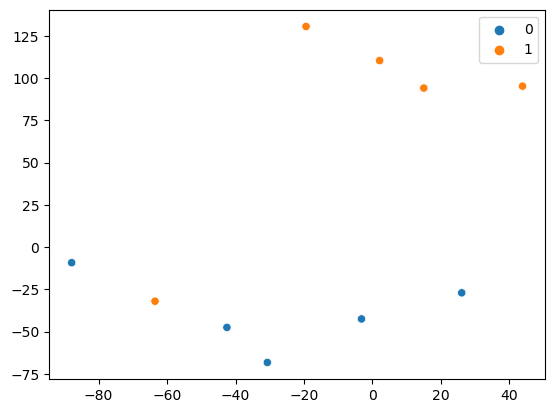

In [13]:
sb.scatterplot(x=X_embedded[:,0], y=X_embedded[:,1], hue = [0, 0, 0, 0, 0, 1, 1, 1, 1 ,1])
plt.show()

In [14]:
glove_model.most_similar_to_given('happy', ['sad', 'glad', 'gloomy', 'delighted'])

'glad'

In [15]:
glove_model.similar_by_word('microsoft')

[('yahoo', 0.9120891094207764),
 ('ibm', 0.8998064398765564),
 ('mobile', 0.8952714204788208),
 ('software', 0.8884522318840027),
 ('samsung', 0.8879263997077942),
 ('firefox', 0.8869080543518066),
 ('apple', 0.8858076333999634),
 ('nexus', 0.8854407072067261),
 ('google', 0.885413646697998),
 ('sony', 0.8819253444671631)]

In [29]:
glove_model.similar_by_word('green')

[('blue', 0.9461891055107117),
 ('orange', 0.9397535920143127),
 ('white', 0.9339037537574768),
 ('red', 0.9331719279289246),
 ('black', 0.9278547763824463),
 ('yellow', 0.9095075130462646),
 ('gold', 0.9032607674598694),
 ('purple', 0.9009455442428589),
 ('crystal', 0.8919300436973572),
 ('ice', 0.8898358941078186)]